In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import joblib 

In [2]:
mobile_data = pd.read_csv('train.csv')

In [3]:
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
mobile_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: xlabel='price_range', ylabel='count'>

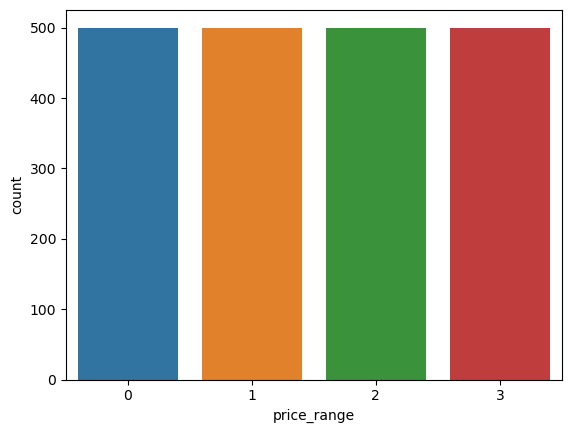

In [6]:
sns.countplot(data=mobile_data,x='price_range')

<BarContainer object of 2000 artists>

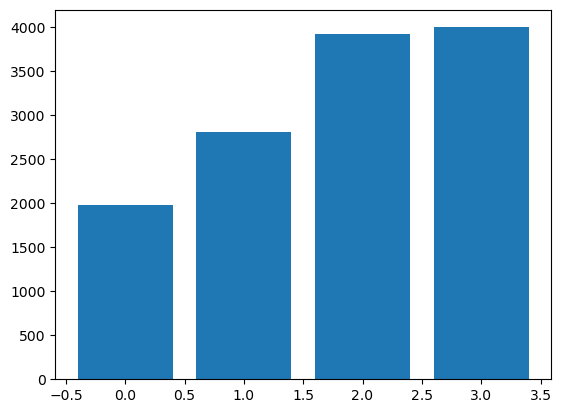

In [7]:
plt.bar(mobile_data['price_range'],mobile_data['ram'])

In [8]:
mobile_data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

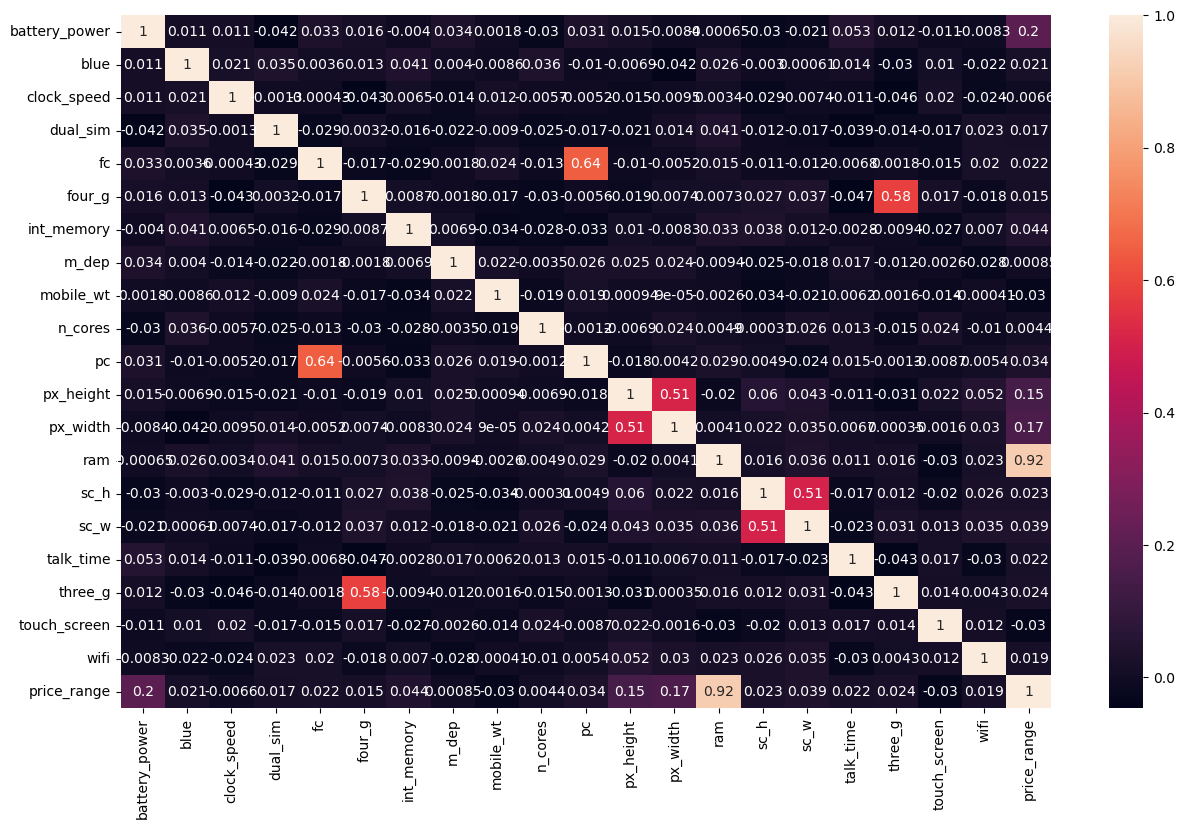

In [9]:
plt.figure(figsize=(15,9))
sns.heatmap(mobile_data.corr(),annot=True)

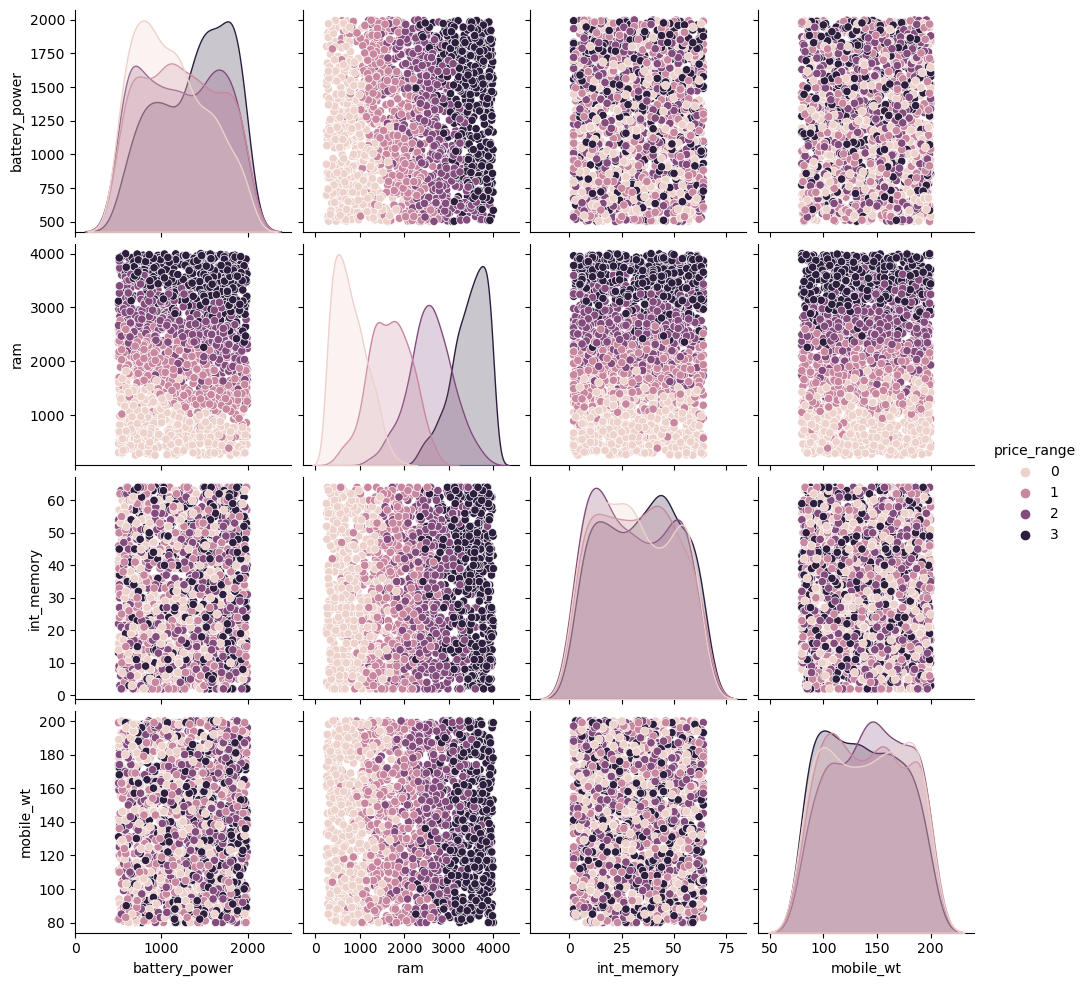

In [10]:
sns.pairplot(mobile_data[['battery_power', 'ram', 'int_memory', 'mobile_wt', 'price_range']], hue='price_range')
plt.show()

In [11]:
X = mobile_data.drop('price_range',axis=1)
Y = mobile_data['price_range']

In [12]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

min_max.fit(X)

MinMaxScaler()

In [13]:
min_max.transform(X)

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [14]:
arr = min_max.transform(X)
X_scaled = pd.DataFrame(arr,columns=X.columns)

In [15]:
X_scaled

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0


In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

In [18]:
knn_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [19]:
knn_model.predict(X_test)

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 3, 1,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 3, 2,
       3, 1, 1, 3, 3, 1, 0, 0, 2, 3, 3, 3, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 2, 3, 2, 1, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 3, 2, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 2, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 2, 1, 3, 1, 0, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 0, 0, 1, 1, 2, 2, 0, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 2, 1, 0, 1, 3, 2, 2, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0, 0, 1, 3, 2, 1, 3, 0, 3, 2, 2, 1, 2, 1, 3, 1, 3, 1, 0, 3, 1,
       1, 2, 3, 0, 2, 3, 3, 0, 3, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 3, 3, 2, 3, 3, 1, 2, 1, 1, 3, 2, 0, 2, 0, 1, 1, 3, 3, 0,
       1, 0, 2, 1, 0, 2, 3, 0, 3, 2, 1, 2, 1, 2, 1, 2, 2, 3, 1, 2, 2, 2,
       2, 1, 2, 3, 2, 3, 0, 1, 1, 0, 2, 1, 0, 2, 3,

In [20]:
predictions = knn_model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        93
           1       0.92      0.89      0.90       106
           2       0.92      0.93      0.92       118
           3       0.96      0.98      0.97        83

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [22]:
confusion_matrix(predictions,Y_test)

array([[ 90,   3,   0,   0],
       [  4,  94,   8,   0],
       [  0,   5, 110,   3],
       [  0,   0,   2,  81]], dtype=int64)

<Axes: >

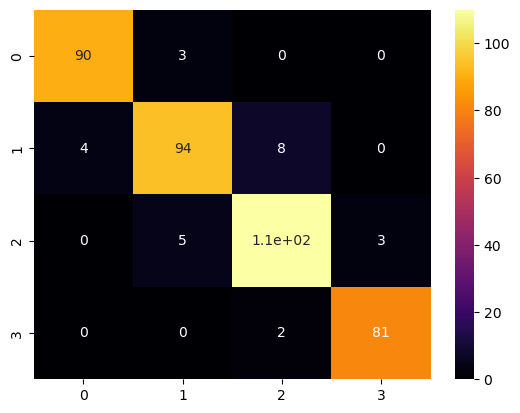

In [23]:
sns.heatmap(confusion_matrix(predictions,Y_test),annot=True,cmap='inferno')

In [24]:
predictions != Y_test

1458    False
198     False
1276    False
1243    False
1267     True
        ...  
257     False
1020    False
1057    False
1230    False
510     False
Name: price_range, Length: 400, dtype: bool

In [25]:
error_rate = []
for k in range(1,20):
    
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,Y_train)
    predictions=knn_model.predict(X_test)
    error_rate.append(np.mean(predictions != Y_test))

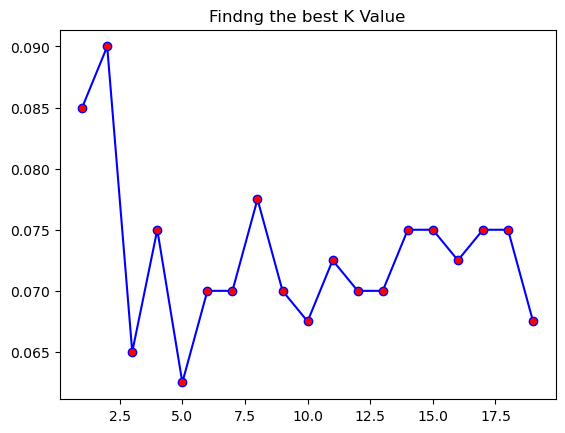

In [26]:
plt.plot(range(1,20),error_rate,marker='o', linestyle='-', color='blue', markerfacecolor='red')
plt.title('Findng the best K Value')
plt.show()

In [27]:
joblib.dump(knn_model,'mobile_price_model.joblib')

['mobile_price_model.joblib']